## Importing Some important packages

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

import seaborn as sns

c:\python 3\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


## Loading Datas

In [2]:

data_bus = pd.read_csv("train_revised.csv")
data_bus.head()

df_test_set = pd.read_csv('test_questions.csv', low_memory=False)

In [3]:
# Keeping only column that are usefull for our study 
data_revised = data_bus.drop(['seat_number', 'payment_method', 'payment_receipt'],axis=1)

data_revised.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,27-11-17,7:12,Migori,Nairobi,Bus,49


In [115]:
# Extra town From Training set: Sori, Keumbu and Oyugis

In [117]:
# Keumbu, Oyugis, 

In [4]:
# This hlep to count the number 
# of ticket sold for a specific ride_id

ride_id_count = {} 
for ride_id in data_revised["ride_id"]:
    if not ride_id in ride_id_count:
        ride_id_count[ride_id] = 1
    else:
        ride_id_count[ride_id] += 1 
        
data_revised.drop_duplicates(inplace=True)
data_revised.reset_index(drop= True, inplace=True)

# Initialise our column with zero
data_revised["number_of_tickets"]= np.zeros(
    len(data_revised),dtype=int)

# we update the number of ticket as follow 
for i in range(len(data_revised)):
    ride_id = data_revised.loc[i]["ride_id"]
    data_revised.at[
        i,"number_of_tickets"] = ride_id_count[ride_id]

In [5]:
data_revised.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickets
0,1442,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,27-11-17,7:12,Migori,Nairobi,Bus,49,31


## Binning

In [6]:
data_revised["Hour"]= data_revised["travel_time"].str.split(':').apply(lambda x: int(x[0]))
data_revised["Minute"]= data_revised["travel_time"].str.split(':').apply(lambda x: int(x[1]))

# data_revised data_revised["Day_week"].dt.strftime('%w')
data_revised['travel_date'] = pd.to_datetime(data_revised['travel_date'])

data_revised['Day_week'] = data_revised['travel_date'].dt.strftime('%w')
data_revised['Day_week']=pd.to_numeric(data_revised['Day_week'])

data_revised['year_Month'] = data_revised['travel_date'].dt.strftime('%Y-%m')

data_revised["Day"]= data_revised['travel_date'].dt.strftime('%d')
data_revised["Month"]= data_revised['travel_date'].dt.strftime('%m')
data_revised["year"]= data_revised['travel_date'].dt.strftime('%Y')


In [7]:
data_revised.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickets,Hour,Minute,Day_week,year_Month,Day,Month,year
0,1442,2017-10-17,7:15,Migori,Nairobi,Bus,49,1,7,15,2,2017-10,17,10,2017
1,5437,2017-11-19,7:12,Migori,Nairobi,Bus,49,1,7,12,0,2017-11,19,11,2017
2,5710,2017-11-26,7:05,Keroka,Nairobi,Bus,49,1,7,5,0,2017-11,26,11,2017
3,5777,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,5,7,10,1,2017-11,27,11,2017
4,5778,2017-11-27,7:12,Migori,Nairobi,Bus,49,31,7,12,1,2017-11,27,11,2017


## Datas Visualisation

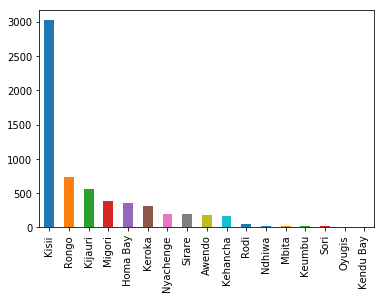

In [8]:
data_revised['travel_from'].value_counts().plot.bar()

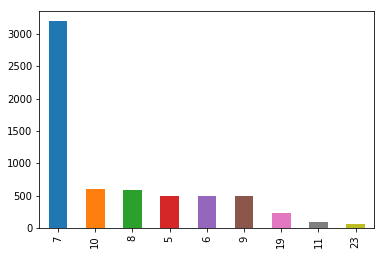

In [9]:
data_revised['Hour'].value_counts().plot.bar()

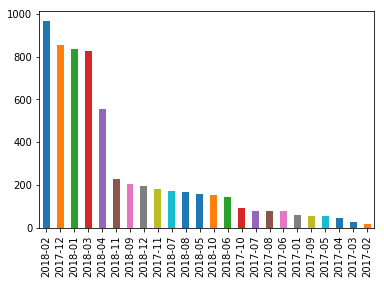

In [10]:
data_revised['year_Month'].value_counts().plot.bar()

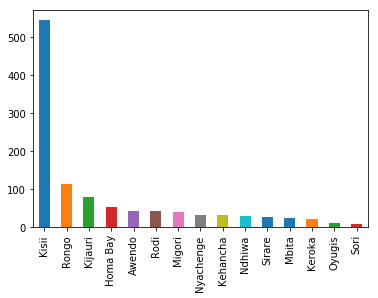

In [12]:
df_test_set.travel_from.value_counts().plot.bar()

As Keumbu is not part of our study and is not in the testing sample provided by zindi, we decided to look at it as noice in the data and removed it.

In [13]:
# Removing occurance of Keumbu
data_revised.drop(data_revised[data_revised['travel_from']=='Keumbu'].index, inplace=True)

# Removing occurance of Kendu bay not in the test set
data_revised.drop(data_revised[data_revised['travel_from']=='Kendu Bay'].index, inplace=True)


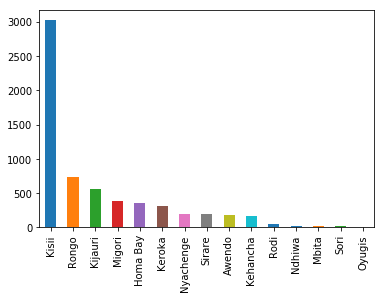

In [14]:
data_revised['travel_from'].value_counts().plot.bar()

In [15]:
data_revised.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickets,Hour,Minute,Day_week,year_Month,Day,Month,year
0,1442,2017-10-17,7:15,Migori,Nairobi,Bus,49,1,7,15,2,2017-10,17,10,2017
1,5437,2017-11-19,7:12,Migori,Nairobi,Bus,49,1,7,12,0,2017-11,19,11,2017
2,5710,2017-11-26,7:05,Keroka,Nairobi,Bus,49,1,7,5,0,2017-11,26,11,2017
3,5777,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,5,7,10,1,2017-11,27,11,2017
4,5778,2017-11-27,7:12,Migori,Nairobi,Bus,49,31,7,12,1,2017-11,27,11,2017


We are doing some feature engeneering that will increase accurency of our predictor.

In [16]:
def classOur(x) :
    if (int(x[0])==7):
        return 1
    return 2

data_revised["Time_classify"] = data_revised["travel_time"].str.split(':').apply(classOur)

def classProv(x) :
    if (x[0]=='Kisii'):
        return 1
    return 2
data_revised["Class_Prov"] = data_revised["travel_from"].str.split(':').apply(classProv)


def classdate(x) :
#     if (x[0]=='2018/01' or x[0]=='2018/02' or x[0]=='2018/03' or x[0]=='2018/04' or x[0]=='2017/12'):
    if (((x[0]=='2017') and (x[1]=='12')) or 
       ((x[0]=='2018') and (x[1]=='01')) or
       ((x[0]=='2018') and (x[1]=='02')) or
       ((x[0]=='2018') and (x[1]=='03')) or
       ((x[0]=='2018') and (x[1]=='04'))):
        return 1
    return 2
data_revised["Class_Data"] = data_revised["year_Month"].str.split('-').apply(classdate)


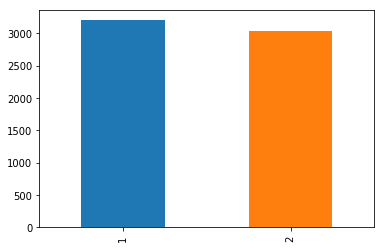

In [17]:
data_revised.Time_classify.value_counts().plot.bar()

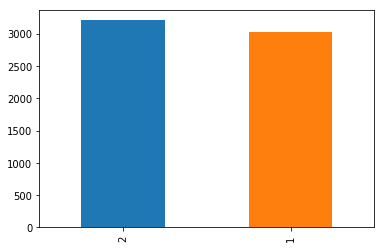

In [18]:
data_revised.Class_Prov.value_counts().plot.bar()

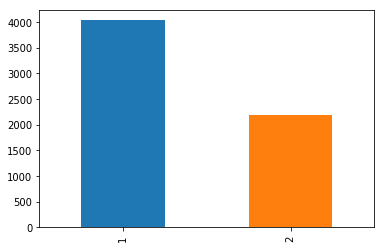

In [19]:
data_revised.Class_Data.value_counts().plot.bar()

As Random Forest requiere the input features to have numerical value, wil will have to encore our categorical variable, in such a way that they can be view by our model as numerical values.


In [20]:
data_revised["travel_date"] = pd.to_datetime(data_revised["travel_date"],infer_datetime_format=True)
data_revised["travel_date"] = data_revised["travel_date"].dt.dayofweek #change the full date to day of week

data_revised["car_type"] = pd.Categorical(data_revised["car_type"])
# car_type_categories = data_revised.car_type.cat.categories
data_revised["car_type"] = data_revised.car_type.cat.codes

data_revised["travel_from"] = pd.Categorical(data_revised["travel_from"])
# travel_from_categories = data_revised.travel_from.cat.categories
data_revised["travel_from"] = data_revised.travel_from.cat.codes

data_revised["travel_to"] = pd.Categorical(data_revised["travel_to"])
data_revised["travel_to"] = data_revised.travel_to.cat.codes

data_revised["travel_time"] = data_revised["travel_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

# data_revised["travel_time"] = data_revised["travel_time"].str.split(':').apply(lambda x: int(x[0]))

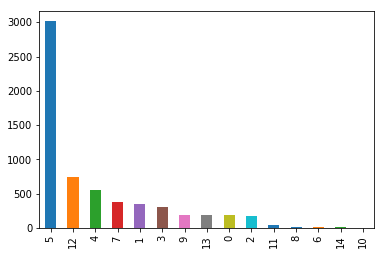

In [21]:
data_revised['travel_from'].value_counts().plot.bar()

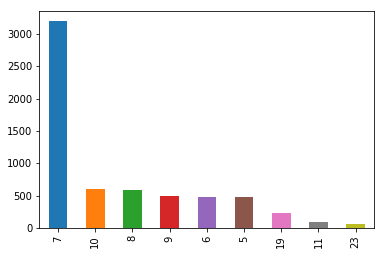

In [22]:
data_revised['Hour'].value_counts().plot.bar()

In [23]:
data_revised.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickets,Hour,Minute,Day_week,year_Month,Day,Month,year,Time_classify,Class_Prov,Class_Data
0,1442,1,435,7,0,0,49,1,7,15,2,2017-10,17,10,2017,1,2,2
1,5437,6,432,7,0,0,49,1,7,12,0,2017-11,19,11,2017,1,2,2
2,5710,6,425,3,0,0,49,1,7,5,0,2017-11,26,11,2017,1,2,2
3,5777,0,430,1,0,0,49,5,7,10,1,2017-11,27,11,2017,1,2,2
4,5778,0,432,7,0,0,49,31,7,12,1,2017-11,27,11,2017,1,2,2


In [24]:
data_revised.Time_classify.value_counts()

1    3198
2    3030
Name: Time_classify, dtype: int64

# Model

In [25]:
data_revised.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickets,Hour,Minute,Day_week,year_Month,Day,Month,year,Time_classify,Class_Prov,Class_Data
0,1442,1,435,7,0,0,49,1,7,15,2,2017-10,17,10,2017,1,2,2
1,5437,6,432,7,0,0,49,1,7,12,0,2017-11,19,11,2017,1,2,2
2,5710,6,425,3,0,0,49,1,7,5,0,2017-11,26,11,2017,1,2,2
3,5777,0,430,1,0,0,49,5,7,10,1,2017-11,27,11,2017,1,2,2
4,5778,0,432,7,0,0,49,31,7,12,1,2017-11,27,11,2017,1,2,2


In [39]:
from sklearn.model_selection import train_test_split

# We put features that will help us predict number of ticket together in X
X = data_revised[["Day_week", "Time_classify", "travel_time", "travel_from", "car_type", "max_capacity"]]

# For competition
X_comp = data_revised[["Day_week", "Class_Data", "Time_classify", "travel_time", "travel_from", "car_type", "max_capacity"]]


# Our target variable is the number of ticket 
y = data_revised.number_of_tickets

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4982, 6) (4982,)
Test set: (1246, 6) (1246,)


In [40]:
X.head()

,Day_week,Time_classify,travel_time,travel_from,car_type,max_capacity
0,2,1,435,7,0,49
1,0,1,432,7,0,49
2,0,1,425,3,0,49
3,1,1,430,1,0,49
4,1,1,432,7,0,49


In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6228 entries, 0 to 6248
Data columns (total 6 columns):
Day_week         6228 non-null int64
Time_classify    6228 non-null int64
travel_time      6228 non-null int64
travel_from      6228 non-null int8
car_type         6228 non-null int8
max_capacity     6228 non-null int64
dtypes: int64(4), int8(2)
memory usage: 255.4 KB


## Random Forest

### Spleet version

In [42]:
model = RandomForestRegressor(n_estimators=100, criterion="mae", n_jobs=-1)

In [43]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [44]:
y_preds = model.predict(X_test)

In [45]:
y_preds = np.rint(y_preds)

#### Error Checking

In [46]:
print (mean_absolute_error(y_preds,y_test))

3.8691813804173356


# Other Regressor Method

## Linear Regression

In [52]:
from sklearn import linear_model

In [53]:
# Create linear regression object
linear = linear_model.LinearRegression()
# Train the model using the training sets and check score
linear.fit(X_train, y_train)
linear.score(X_train, y_train)
#Equation coefficient and Intercept
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
#Predict Output
predicted= linear.predict(X_test)

Coefficient: 
 [ 0.02533938 -1.27059187  0.01174747 -0.24145537 -0.0021016   0.07986083]
Intercept: 
 3.2053611229240584


In [54]:
print (mean_absolute_error(predicted,y_test))

6.023043587624796


Not good at all.

## KNeighborsRegressor

In [55]:
from sklearn.neighbors import KNeighborsRegressor

In [56]:
neigh = KNeighborsRegressor(n_neighbors=16)
neigh.fit(X_train, y_train) 

y_preds3 = neigh.predict(X_test)

In [57]:
print (mean_absolute_error(y_preds3,y_test))

4.282403691813804


## CatBoostRegressor

In [58]:
X.head()

,Day_week,Time_classify,travel_time,travel_from,car_type,max_capacity
0,2,1,435,7,0,49
1,0,1,432,7,0,49
2,0,1,425,3,0,49
3,1,1,430,1,0,49
4,1,1,432,7,0,49


In [71]:
from catboost import CatBoostRegressor

model_cat = CatBoostRegressor()

# Specify cathegorical variable 
cat_features = [0, 1, 2, 3, 4, 5] 
# model_cat.fit(X_train, y_train, cat_features)
model_cat.fit(X_train, y_train)

0:	learn: 11.6925786	total: 21.3ms	remaining: 21.3s
1:	learn: 11.4779037	total: 42ms	remaining: 20.9s
2:	learn: 11.2960223	total: 66.8ms	remaining: 22.2s
3:	learn: 11.0923661	total: 89.8ms	remaining: 22.4s
4:	learn: 10.9040007	total: 114ms	remaining: 22.8s
5:	learn: 10.7505630	total: 129ms	remaining: 21.3s
6:	learn: 10.5661745	total: 152ms	remaining: 21.6s
7:	learn: 10.4034143	total: 178ms	remaining: 22s
8:	learn: 10.2589444	total: 202ms	remaining: 22.3s
9:	learn: 10.1098182	total: 241ms	remaining: 23.9s
10:	learn: 9.9546241	total: 269ms	remaining: 24.1s
11:	learn: 9.8452787	total: 287ms	remaining: 23.6s
12:	learn: 9.6898034	total: 317ms	remaining: 24.1s
13:	learn: 9.5591901	total: 340ms	remaining: 23.9s
14:	learn: 9.4219820	total: 363ms	remaining: 23.8s
15:	learn: 9.3148298	total: 381ms	remaining: 23.4s
16:	learn: 9.1845410	total: 404ms	remaining: 23.4s
17:	learn: 9.0673365	total: 440ms	remaining: 24s
18:	learn: 8.9567825	total: 465ms	remaining: 24s
19:	learn: 8.8577288	total: 486ms	r

162:	learn: 6.0532775	total: 4.57s	remaining: 23.5s
163:	learn: 6.0514188	total: 4.6s	remaining: 23.4s
164:	learn: 6.0490978	total: 4.63s	remaining: 23.4s
165:	learn: 6.0419225	total: 4.66s	remaining: 23.4s
166:	learn: 6.0412764	total: 4.68s	remaining: 23.3s
167:	learn: 6.0381361	total: 4.71s	remaining: 23.3s
168:	learn: 6.0378248	total: 4.73s	remaining: 23.2s
169:	learn: 6.0371044	total: 4.76s	remaining: 23.2s
170:	learn: 6.0331418	total: 4.78s	remaining: 23.2s
171:	learn: 6.0281148	total: 4.81s	remaining: 23.2s
172:	learn: 6.0273842	total: 4.84s	remaining: 23.2s
173:	learn: 6.0244416	total: 4.87s	remaining: 23.1s
174:	learn: 6.0230645	total: 4.9s	remaining: 23.1s
175:	learn: 6.0216586	total: 4.92s	remaining: 23.1s
176:	learn: 6.0192842	total: 4.95s	remaining: 23s
177:	learn: 6.0149718	total: 4.98s	remaining: 23s
178:	learn: 6.0145412	total: 5s	remaining: 23s
179:	learn: 6.0130259	total: 5.03s	remaining: 22.9s
180:	learn: 6.0057783	total: 5.06s	remaining: 22.9s
181:	learn: 6.0030491	t

328:	learn: 5.8313680	total: 9.12s	remaining: 18.6s
329:	learn: 5.8298378	total: 9.14s	remaining: 18.6s
330:	learn: 5.8280853	total: 9.18s	remaining: 18.5s
331:	learn: 5.8279402	total: 9.2s	remaining: 18.5s
332:	learn: 5.8272732	total: 9.23s	remaining: 18.5s
333:	learn: 5.8272663	total: 9.26s	remaining: 18.5s
334:	learn: 5.8263253	total: 9.29s	remaining: 18.4s
335:	learn: 5.8252231	total: 9.33s	remaining: 18.4s
336:	learn: 5.8234928	total: 9.35s	remaining: 18.4s
337:	learn: 5.8230272	total: 9.41s	remaining: 18.4s
338:	learn: 5.8224595	total: 9.45s	remaining: 18.4s
339:	learn: 5.8192225	total: 9.49s	remaining: 18.4s
340:	learn: 5.8163941	total: 9.54s	remaining: 18.4s
341:	learn: 5.8163724	total: 9.57s	remaining: 18.4s
342:	learn: 5.8163684	total: 9.59s	remaining: 18.4s
343:	learn: 5.8159582	total: 9.62s	remaining: 18.3s
344:	learn: 5.8155208	total: 9.65s	remaining: 18.3s
345:	learn: 5.8154827	total: 9.67s	remaining: 18.3s
346:	learn: 5.8146148	total: 9.7s	remaining: 18.3s
347:	learn: 5.

492:	learn: 5.7366791	total: 13.4s	remaining: 13.8s
493:	learn: 5.7365380	total: 13.4s	remaining: 13.8s
494:	learn: 5.7355113	total: 13.5s	remaining: 13.7s
495:	learn: 5.7354977	total: 13.5s	remaining: 13.7s
496:	learn: 5.7351422	total: 13.5s	remaining: 13.7s
497:	learn: 5.7347425	total: 13.5s	remaining: 13.7s
498:	learn: 5.7347095	total: 13.6s	remaining: 13.6s
499:	learn: 5.7334171	total: 13.6s	remaining: 13.6s
500:	learn: 5.7332483	total: 13.6s	remaining: 13.6s
501:	learn: 5.7316214	total: 13.6s	remaining: 13.5s
502:	learn: 5.7315981	total: 13.7s	remaining: 13.5s
503:	learn: 5.7301440	total: 13.7s	remaining: 13.5s
504:	learn: 5.7299698	total: 13.7s	remaining: 13.5s
505:	learn: 5.7295598	total: 13.8s	remaining: 13.4s
506:	learn: 5.7283553	total: 13.8s	remaining: 13.4s
507:	learn: 5.7283532	total: 13.8s	remaining: 13.4s
508:	learn: 5.7274002	total: 13.8s	remaining: 13.3s
509:	learn: 5.7272218	total: 13.9s	remaining: 13.3s
510:	learn: 5.7272205	total: 13.9s	remaining: 13.3s
511:	learn: 

657:	learn: 5.6863698	total: 17.4s	remaining: 9.03s
658:	learn: 5.6863259	total: 17.4s	remaining: 9s
659:	learn: 5.6852964	total: 17.4s	remaining: 8.97s
660:	learn: 5.6852935	total: 17.4s	remaining: 8.94s
661:	learn: 5.6852924	total: 17.4s	remaining: 8.9s
662:	learn: 5.6844712	total: 17.5s	remaining: 8.88s
663:	learn: 5.6844329	total: 17.5s	remaining: 8.85s
664:	learn: 5.6842535	total: 17.5s	remaining: 8.82s
665:	learn: 5.6841413	total: 17.5s	remaining: 8.8s
666:	learn: 5.6841215	total: 17.6s	remaining: 8.77s
667:	learn: 5.6839672	total: 17.6s	remaining: 8.74s
668:	learn: 5.6828631	total: 17.6s	remaining: 8.72s
669:	learn: 5.6828492	total: 17.6s	remaining: 8.69s
670:	learn: 5.6828134	total: 17.7s	remaining: 8.67s
671:	learn: 5.6823675	total: 17.7s	remaining: 8.64s
672:	learn: 5.6815024	total: 17.7s	remaining: 8.62s
673:	learn: 5.6814998	total: 17.8s	remaining: 8.59s
674:	learn: 5.6814617	total: 17.8s	remaining: 8.57s
675:	learn: 5.6814568	total: 17.8s	remaining: 8.54s
676:	learn: 5.681

816:	learn: 5.6598936	total: 21.4s	remaining: 4.79s
817:	learn: 5.6598918	total: 21.4s	remaining: 4.76s
818:	learn: 5.6598909	total: 21.4s	remaining: 4.74s
819:	learn: 5.6595066	total: 21.5s	remaining: 4.71s
820:	learn: 5.6595042	total: 21.5s	remaining: 4.69s
821:	learn: 5.6593592	total: 21.5s	remaining: 4.66s
822:	learn: 5.6592196	total: 21.6s	remaining: 4.64s
823:	learn: 5.6588340	total: 21.6s	remaining: 4.62s
824:	learn: 5.6587912	total: 21.6s	remaining: 4.59s
825:	learn: 5.6585124	total: 21.7s	remaining: 4.57s
826:	learn: 5.6585030	total: 21.7s	remaining: 4.54s
827:	learn: 5.6573741	total: 21.8s	remaining: 4.52s
828:	learn: 5.6573715	total: 21.8s	remaining: 4.49s
829:	learn: 5.6573691	total: 21.8s	remaining: 4.47s
830:	learn: 5.6573672	total: 21.8s	remaining: 4.44s
831:	learn: 5.6573643	total: 21.9s	remaining: 4.42s
832:	learn: 5.6573123	total: 21.9s	remaining: 4.39s
833:	learn: 5.6571061	total: 22s	remaining: 4.37s
834:	learn: 5.6571046	total: 22s	remaining: 4.34s
835:	learn: 5.65

982:	learn: 5.6475611	total: 25.5s	remaining: 442ms
983:	learn: 5.6475611	total: 25.5s	remaining: 415ms
984:	learn: 5.6475599	total: 25.6s	remaining: 389ms
985:	learn: 5.6475566	total: 25.6s	remaining: 363ms
986:	learn: 5.6468335	total: 25.6s	remaining: 337ms
987:	learn: 5.6468327	total: 25.6s	remaining: 311ms
988:	learn: 5.6468320	total: 25.6s	remaining: 285ms
989:	learn: 5.6468313	total: 25.7s	remaining: 259ms
990:	learn: 5.6468273	total: 25.7s	remaining: 233ms
991:	learn: 5.6468210	total: 25.7s	remaining: 207ms
992:	learn: 5.6468165	total: 25.7s	remaining: 181ms
993:	learn: 5.6468164	total: 25.7s	remaining: 155ms
994:	learn: 5.6468158	total: 25.8s	remaining: 129ms
995:	learn: 5.6468153	total: 25.8s	remaining: 104ms
996:	learn: 5.6468152	total: 25.8s	remaining: 77.6ms
997:	learn: 5.6468152	total: 25.8s	remaining: 51.7ms
998:	learn: 5.6468110	total: 25.8s	remaining: 25.9ms
999:	learn: 5.6468106	total: 25.8s	remaining: 0us


In [74]:
preds = model_cat.predict(X_test)

preds = np.rint(preds)

In [75]:
print (mean_absolute_error(preds,y_test))

3.865168539325843


## XGBoost

In [48]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6228 entries, 0 to 6248
Data columns (total 6 columns):
Day_week         6228 non-null int64
Time_classify    6228 non-null int64
travel_time      6228 non-null int64
travel_from      6228 non-null int8
car_type         6228 non-null int8
max_capacity     6228 non-null int64
dtypes: int64(4), int8(2)
memory usage: 255.4 KB


In [63]:
xgb_model = xgb.XGBRegressor()

xgb_model.fit(X_train, y_train)
# xgb_model.fit(X, y)


y_pred_xgb = xgb_model.predict(X_test)

In [64]:
print (mean_absolute_error(y_pred_xgb,y_test))

3.982234814193811


## XGBoost

In [48]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6228 entries, 0 to 6248
Data columns (total 6 columns):
Day_week         6228 non-null int64
Time_classify    6228 non-null int64
travel_time      6228 non-null int64
travel_from      6228 non-null int8
car_type         6228 non-null int8
max_capacity     6228 non-null int64
dtypes: int64(4), int8(2)
memory usage: 255.4 KB


In [50]:
xgb_model = xgb.XGBRegressor()

xgb_model.fit(X, y)
# xgb_model.fit(X, y)


y_pred_xgb = xgb_model.predict(X_test)

In [51]:
print (mean_absolute_error(y_pred_xgb,y_test))

3.8973900331348705


### All dataset (For the cometition purpose)

In [227]:
# model_all = RandomForestRegressor(n_estimators=100, criterion="mae", n_jobs=-1)
model_all = RandomForestRegressor(n_estimators=100, criterion='mae', max_depth=None, 
                                  min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                                  random_state=None, verbose=0, warm_start=False)

In [228]:
model_all.fit(X_comp,y)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [229]:
y_preds_all = model_all.predict(X)

In [230]:
y_preds_all = np.rint(y_preds_all)

In [231]:
X.head()

,Day_week,Class_Data,Time_classify,travel_time,travel_from,car_type,max_capacity
0,2,2,1,435,7,0,49
1,0,2,1,432,7,0,49
2,0,2,1,425,3,0,49
3,1,2,1,430,1,0,49
4,1,2,1,432,7,0,49


#### Error Checking

In [232]:
print (mean_absolute_error(y_preds_all,y))

2.9373795761079


Using rint()
with id : 1.1870699311889903
with id and travel_to : 1.172827652424388


In [938]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6249 entries, 0 to 6248
Data columns (total 5 columns):
Day_week        6249 non-null int64
travel_time     6249 non-null int64
travel_from     6249 non-null int8
car_type        6249 non-null int8
max_capacity    6249 non-null int64
dtypes: int64(3), int8(2)
memory usage: 158.7 KB


# Testing 

In [209]:
df_test_set = pd.read_csv('test_questions.csv', low_memory=False)

In [210]:
df_test_set.max_capacity.value_counts()

49    599
11    512
Name: max_capacity, dtype: int64

In [211]:
df_test_set.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11


In [212]:
df_test_set["Hour"]= df_test_set["travel_time"].str.split(':').apply(lambda x: int(x[0]))
df_test_set["Minute"]= df_test_set["travel_time"].str.split(':').apply(lambda x: int(x[1]))

df_test_set['travel_date'] = pd.to_datetime(df_test_set['travel_date'])
df_test_set['Day_week'] = df_test_set['travel_date'].dt.strftime('%w')
df_test_set['Day_week'] = pd.to_numeric(df_test_set['Day_week'])

df_test_set['year_Month'] = df_test_set['travel_date'].dt.strftime('%Y-%m')

df_test_set["Day"]= df_test_set['travel_date'].dt.strftime('%d')
df_test_set["Month"]= df_test_set['travel_date'].dt.strftime('%m')
df_test_set["year"]= df_test_set['travel_date'].dt.strftime('%Y')

# def classOur(x) :
#     if (int(x[0])==7):
#         return 0
#     if (int(x[0])>19):
#         return 1
#     return 2

def classOur(x) :
    if (int(x[0])==7):
        return 1
    return 2

df_test_set["Time_classify"] = df_test_set["travel_time"].str.split(':').apply(classOur)

def classProv(x) :
    if (x[0]=='Kisii'):
        return 1
    return 2
df_test_set["Class_Prov"] = df_test_set["travel_from"].str.split(':').apply(classProv)



In [213]:
def classdate(x) :
#     if (x[0]=='2018/01' or x[0]=='2018/02' or x[0]=='2018/03' or x[0]=='2018/04' or x[0]=='2017/12'):
    if (((x[0]=='2017') and (x[1]=='12')) or 
       ((x[0]=='2018') and (x[1]=='01')) or
       ((x[0]=='2018') and (x[1]=='02')) or
       ((x[0]=='2018') and (x[1]=='03')) or
       ((x[0]=='2018') and (x[1]=='04'))):
        return 1
    return 2
df_test_set["Class_Data"] = df_test_set["year_Month"].str.split('-').apply(classdate)


In [214]:
# df_test_set["travel_date"] = pd.to_datetime(df_test_set["travel_date"],infer_datetime_format=True)
# df_test_set["travel_date"] = df_test_set["travel_date"].dt.dayofweek #change the full date to day of week

df_test_set["car_type"] = pd.Categorical(df_test_set["car_type"])
# car_type_categories = data_revised.car_type.cat.categories
df_test_set["car_type"] = df_test_set.car_type.cat.codes

df_test_set["travel_from"] = pd.Categorical(df_test_set["travel_from"])
# travel_from_categories = data_revised.travel_from.cat.categories
df_test_set["travel_from"] = df_test_set.travel_from.cat.codes

df_test_set["travel_to"] = pd.Categorical(df_test_set["travel_to"])
df_test_set["travel_to"] = df_test_set.travel_to.cat.codes

df_test_set["travel_time"] = df_test_set["travel_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

# df_test_set["travel_time"] = df_test_set["travel_time"].str.split(':').apply(lambda x: int(x[0]))

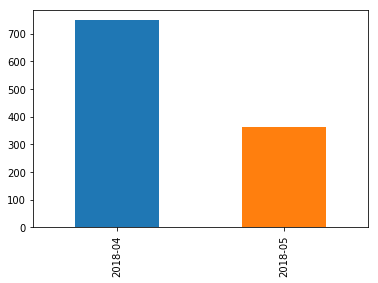

In [207]:
df_test_set.year_Month.value_counts().plot.bar()

In [153]:
df_test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 17 columns):
ride_id          1111 non-null int64
travel_date      1111 non-null datetime64[ns]
travel_time      1111 non-null int64
travel_from      1111 non-null int8
travel_to        1111 non-null int8
car_type         1111 non-null int8
max_capacity     1111 non-null int64
Hour             1111 non-null int64
Minute           1111 non-null int64
Day_week         1111 non-null int64
year_Month       1111 non-null object
Day              1111 non-null object
Month            1111 non-null object
year             1111 non-null object
Time_classify    1111 non-null int64
Class_Prov       1111 non-null int64
Class_Data       1111 non-null int64
dtypes: datetime64[ns](1), int64(9), int8(3), object(4)
memory usage: 124.8+ KB


In [233]:
X_ = df_test_set[["Day_week", "Class_Data",  "Time_classify", "travel_time", "travel_from", "car_type", "max_capacity"]]
# X_ = df_test_set[["Month", "travel_time", "travel_from", "car_type", "max_capacity"]]

X_.head()                    

,Day_week,Class_Data,Time_classify,travel_time,travel_from,car_type,max_capacity
0,1,2,1,426,5,0,49
1,0,2,2,668,5,1,11
2,5,2,2,300,5,1,11
3,5,2,2,550,5,1,11
4,5,2,2,560,5,1,11


In [216]:
X_.head()                    

,Day_week,Class_Data,Class_Prov,Time_classify,travel_time,travel_from,car_type,max_capacity
0,1,2,1,1,426,5,0,49
1,0,2,1,2,668,5,1,11
2,5,2,1,2,300,5,1,11
3,5,2,1,2,550,5,1,11
4,5,2,1,2,560,5,1,11


In [217]:
# from sklearn import preprocessing
# X_ = preprocessing.StandardScaler().fit(X).transform(X)

In [234]:
test_set_predictions = model_all.predict(X_)
# test_set_predictions = model_cat.predict(X_)

In [235]:
test_set_predictions = np.rint(test_set_predictions)

In [236]:
# test_set_predictions[:10]

In [237]:
d = {'ride_id': df_test_set["ride_id"], 'number_of_ticket': test_set_predictions}
df_predictions = pd.DataFrame(data=d)
df_predictions = df_predictions[['ride_id','number_of_ticket']]

df_predictions.head()

,ride_id,number_of_ticket
0,247,9.0
1,256,4.0
2,275,2.0
3,285,9.0
4,286,9.0


Saving our file

In [238]:
df_predictions.to_csv('predi_2.9.csv', index=False) #save to csv file

### This is just for fun, supposing that the first five rowns in the sample submission are true

In [409]:
df_test = pd.read_csv('sample_submission.csv', low_memory=False)
df_test.head()

,ride_id,number_of_ticket
0,247,4.0
1,256,2.0
2,275,5.0
3,285,7.0
4,286,9.0


In [410]:
y_test_ = df_test.number_of_ticket

In [871]:
print (mean_absolute_error(test_set_predictions[:5],y_test_[:5]))

3.4
